In [ ]:
!pip install dspftw
!pip install dspftwplot
!pip install numpy
!pip install scipy

import numpy as np
import matplotlib.pyplot as plt
import dspftw
import dspftwplot

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


We will define the **cardinal sine** (sinc) function and it's fourier transform (the box function) in the continuous realm. When needed we will work with sampled versions of both. The sinc and the box functions are two of the most commonly used functions in Fourier Analysis. We will use both in both the time and frequency domains.

**Definition:** The **sinc function** is defined to be $$\large {\rm sinc}(x) := \begin{cases}\frac{\sin(\pi x)}, & x \neq 0 \\ 1, & x = 0 \end{cases} $$

**Definition:** The **box function** is defined to be $$\large Π(x) := \begin{cases} 1, & -\frac{1}{2} ≤ x \leq \frac{1}{2} \\ 0, & x < -\frac{1}{2}\ {\rm or}\ x > \frac{1}{2} \end{cases}$$

Why is $\Pi$ (capital pi) used as a symbol for the box function?

Reference: A First Course in Fourier Analysis by David W. Kammler

(-1.0, 2.0)

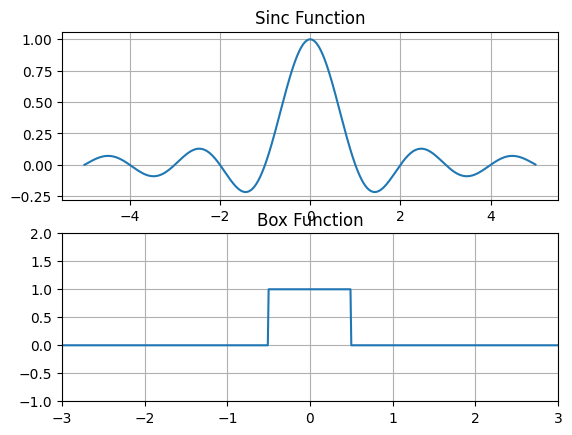

In [ ]:
sample_rate = 100
range = 5
time = np.arange(-range, range, 1/sample_rate)

range2 = 3
time2 = np.arange(-range2, range2, 1/sample_rate)

box_zero = np.zeros((1,int((2*range2-1)*(sample_rate/2))))
box = np.concatenate((box_zero, np.ones((1,sample_rate)), box_zero),axis=None)

sinc = np.sinc(time)

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.grid(True)
ax1.plot(time, sinc)
ax1.set_title('Sinc Function')
plt.xlim(-range, range)
plt.ylim(-1, 2)

ax2.grid(True)
ax2.plot(time2, box)
ax2.set_title('Box Function')
plt.xlim(-range2, range2)
plt.ylim(-1, 2)


## **Remark:**

The function $s(t) = sin(\pi t)$ has a zero (crosses the horizontal axis) at every integer. The function $\large {\rm sinc}(t) = \frac{\sin(\pi t)}{\pi t}$ has a zero at every integer except at $t=0$. This will be useful when filtering signals and leaving the signal at the baud times unchanged.

(-1.0, 1.0)

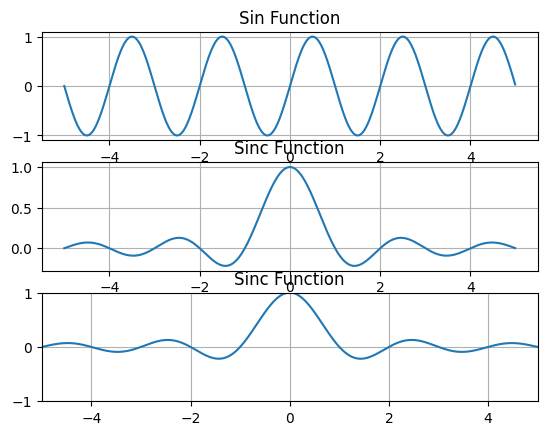

In [ ]:
sample_rate = 100
range = 5
time = np.arange(-range, range, 1/sample_rate)


# Create a figure and two subplots
fig, (ax1,ax2,ax3) = plt.subplots(3, 1)
ax1.grid(True)
ax1.plot(time, np.sin(np.pi*time))
ax1.set_title('Sin Function')
plt.xlim(-range, range)
plt.ylim(-1, 2)

ax2.grid(True)
ax2.plot(time, np.sin(np.pi*time)/(np.pi*time))
ax2.set_title('Sinc Function')
plt.xlim(-range, range)
plt.ylim(-1,1)

ax3.grid(True)
ax3.plot(time, np.sinc(time))
ax3.set_title('Sinc Function')
plt.xlim(-range, range)
plt.ylim(-1,1)

## **FFT of the Sinc Function**

$\newcommand{\Ft}{\mathscr{F}}$ The Fourier transform of the sinc function is the box function. That is, if $s(t) = {\rm sinc}(t)$ then the fourier transform is $S(f) = \Pi(f)$. Thus if $S(f) = \Pi(f)$ then the inverse fourier transform is $s(t) = {\rm sinc}(t)$.

## **Example**

Verify the FFT of the sinc function is the box function.

Explain how increasing the FFT size, sample rate, and radius affect the frequency domain graph.

Which parameter affects the bandwith of the frequency domain graph?

Find a formula relating the sample rate to the bandwidth of the frequency domain graph.

Which parameter (FFT size, sample rate, radius) does not affect the time domain graph?

How many samples are between adjacent roots (zeros) in the time domain?

What name did we give to the time domain graph for $sr - 1$?


Text(0.5, 1.0, 'Frequency Domain (Mag)')

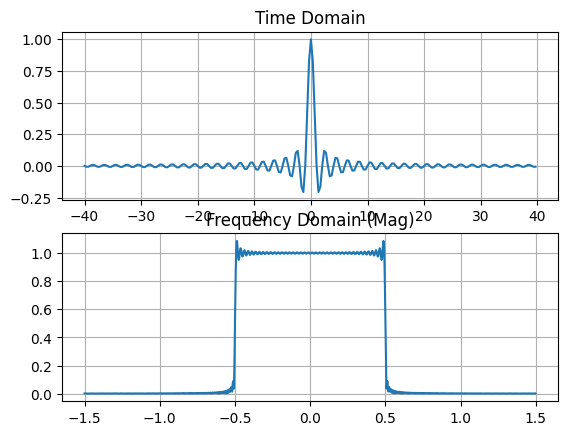

In [ ]:
#FFT size. Increase N to get more frequency domain samples
N = 2**10

sample_rate = 3 # Increase the sample_rate to get a wider view

radius = 40 #Increase the radius to make the shape more box like

#sample points
time = np.arange(-radius, radius, 1/sample_rate)

#Normalized Frequencies
norm_freq = np.arange(0,N)/N

signal_t = np.sinc(time)
SIGNAL_F = np.fft.fft(signal_t, N)

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.grid(True)
ax1.plot(time, signal_t)
ax1.set_title('Time Domain')

ax2.grid(True)
ax2.plot((norm_freq-1/2)*sample_rate, np.fft.fftshift(np.abs(SIGNAL_F))/sample_rate)
ax2.set_title('Frequency Domain (Mag)')

## **Remarks**

For given ${\tt sr}$, the associated box function is "on" for $1/{\tt sr}$ of the bandwidth.

When using sinc$(t)$, it is useful to think of $t$ units as seconds. Thus the sample rate ${\tt sr}$ will tell you how many samples are between consecutive integer inputs and the other way around.

## **How we will use the sinc function**

The sinc function is an example of a low pass filter (LPF). What happens if we point-wise multiply the box function with the power spectrum of another signal? What operation in the time domain corresponds to the point-wise multiply in the frequency domain?

Text(0.5, 1.0, 'Frequency Domain - sinc')

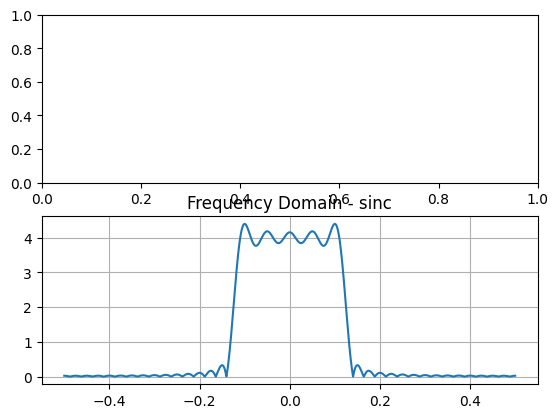

In [ ]:
#FFT size
N = 2**13

#Sample Rate. Increase sample_rate to get a wider view
sample_rate = 4

#radius. Increase radius to make the shape more box like
radius = 5

#Sample points for the sinc function
# Note: The step size is the reciprocal of sr
# Note: Number of points is 2*sample_rate*radius+1
time = np.arange(-radius, radius,1/sample_rate)

signal_t = np.sinc(time)
SIGNAL_F = np.fft.fft(signal_t, N)

# simulated signal function f
# f = dspftw.loadsignal("simgsig/twosigs.br1000.cplx.8000.32f","32f","cmplx","big",1)
# power_f = 20*np.log10(np.abs(np.fft.rfft(f)))

# The fft function will zero pad s_t to get N samples
# Use fftshift to center frequencies around 0

#Normalized Frequencies
norm_freq = np.arange(0,N)/N

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1)

#Plot powerspectrum of f
#ax1.grid(True)
#ax1.plot((norm_freq-1/2), power_f)

ax2.grid(True)
ax2.plot((norm_freq-1/2), np.fft.fftshift(np.abs(SIGNAL_F)))
ax2.set_title('Frequency Domain - sinc')



Sinc is a crude low pass filter. What can you say about the features of the graph below?

What fraction of the frequencies are allowed to pass? What parameter determines the bandwidth of the sinc low pass filter?

In [ ]:
# Convolve f with our sinc function
# ffilt = np.convolve(f,s,"same")
# power_ffilt =  20*np.log10(np.abs(np.fft.rfft(ffilt)))
#fig, (ax1, ax2) = plt.subplots(2, 1)

# Plot powerspectrum
#ax1.grid(True)
#ax1.plot((norm_freq-1/2), power_ffilt)

How many points are in the sinc filter below?

What is the sample rate?

What is the radius?

If this filter is convolved with a signal, what fraction of the frequencies will be allowed to pass?

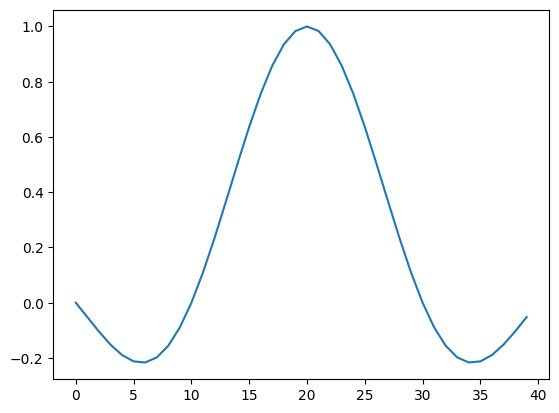

In [ ]:
n = 20
frac = 0.1
filt = np.sinc(np.arange(-n,n,1)*frac)
plt.plot(filt)

## **Exercise**

Design a low pass filter that will preserve energy 2000 Hz wide in the center of a signal sampled at 6000 Hz and filters out all other frequencies. How can you filter tightly around the signal? (i.e. small transistion width) What is the trade-off with having a very short transistion width?

## **FFT of the box function**

$\newcommand{\Ft}{\mathscr{F}}$ The Fourier transform of the box function is the sinc function $s(t) = \Pi(t)$ the fourier transform is $S(f) = {\rm sinc}(f)$. Thus, the fft and ifft of the sinc/box function gives us the other (box/sinc).

## **Example**

Verify the FFT of the box function is the sinc function.

Explain how increasing the FFT size, sample rate, and radius affect the frequency domain graph.

Which parameter affects the bandwidth of the frequency domain graph?

Find a formula relating the sample rate to the bandwidth of the frequency domain graph.

Which parameter (FFT size, sample rate, radius) does not affect the time domain graph?

How many samples are between adjacent roots (zeros) in the freuqncy domain?

What name did we give to the time domain graph for $sr = 1$?


Text(0.5, 1.0, 'Frequency Domain (Mag)')

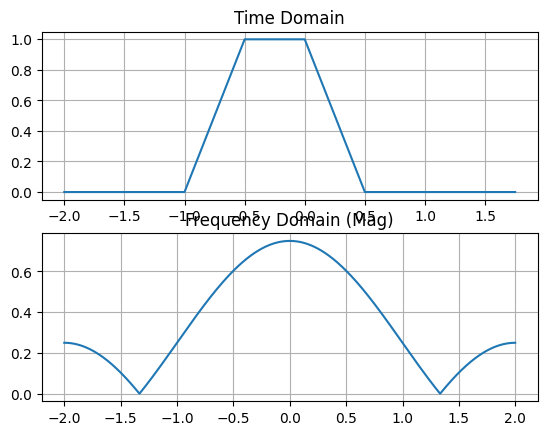

In [ ]:
# FFT size
N = 2**12

#Sample Rate. Increase sample_rate to get a wider view
sample_rate = 4

#Radius. Increase radius to make the shape more box like
radius = 2
#sample points
t1 = np.arange(-radius, -1/2-1/sample_rate, 1/sample_rate)
t2 = np.arange(-1/2, 1/2-1/sample_rate, 1/sample_rate)
t3 = np.arange(1/2, radius, 1/sample_rate)
t_temp = np.concatenate((t1,t2))
time = np.concatenate((t_temp,t3))

#Normalized Frequencies
norm_freq = np.arange(0,N)/N

box_zero = np.zeros((1,len(t1)))
box = np.concatenate((box_zero, np.ones((1,len(t2))), np.zeros((1,len(t3)))),axis=None)
B = np.fft.fft(box, N)

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.grid(True)
ax1.plot(time,box)
ax1.set_title('Time Domain')

ax2.grid(True)
ax2.plot((norm_freq-1/2)*sample_rate, np.fft.fftshift(np.abs(B))/sample_rate)
ax2.set_title('Frequency Domain (Mag)')

## **Squishing/Stretching Property of the Fourier Transform**

Consider the function/signal $s(t)$ and let $a > 1$ be a real number.

How does the graph of $p(t) = s(at)$ compare with the graph $s(t)$?

How does the graph of $P(f)$ compare with the graph of $S(f)$? Horizontally and Vertically?

What happens if $0 < a < 1$?

Text(0.5, 1.0, 'Frequency Domain S(f)')

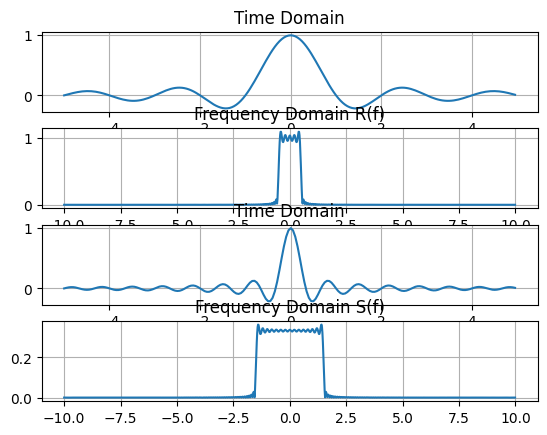

In [ ]:
# Horizontal Scaling factor
a = 3
#FFT size
N = 2**10

#Sample Rate. Increase sample_rate to get a wider view
sample_rate = 20

#Radius. Increase radius to make the shape more box like
radius = 5

#Sample points
t = np.arange(-radius, radius, 1/sample_rate)

#Normalized Frequencies
norm_freq = np.arange(0,N)/N

#sinc function
r = np.sinc(t)
R = np.fft.fft(r, N)

#Horizontally scaled sinc function (a < 1 stretched; a > 1 squished)
s = np.sinc(a*t)
S = np.fft.fft(s,N)

#The fft function will zero pad s to get N samples
#Use np.fft.fftshift to center frequencies around 0
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1)
ax1.grid(True)
ax1.plot(t,r)
ax1.set_title('Time Domain')

ax2.grid(True)
ax2.plot((norm_freq-1/2)*sample_rate, np.fft.fftshift(np.abs(R))/sample_rate)
ax2.set_title('Frequency Domain R(f)')

ax3.grid(True)
ax3.plot(t,s)
ax3.set_title('Time Domain')

ax4.grid(True)
ax4.plot((norm_freq-1/2)*sample_rate, np.fft.fftshift(np.abs(S))/sample_rate)
ax4.set_title('Frequency Domain S(f)')

## **Fourier Property**

Squishing in the time domain stretches in the frequency domain and vice versa. The formula for this property is given here.

$$ {\rm lf}\ a \neq 0\ {\rm and}\ s(t) = r(at)\ {\rm then}\ S(f) = \frac{1}{|a|}R\left(\frac{f}{a}\right)$$

## **Summary: Continuous Fourier Properties**

These are properties for the (continuous) Fourier Transform. Similar properties exist fo the discrete fourier transform. The main benefit we will get from these formulas is helping us think about the fourier properties because the formulas are simpler.

Here $r(t)$ and $s(t)$ are functions/signals in the time domain and $R(f)$ and $S(f)$ are the FTs of $r$ and $s$, respectively. The table lists time domain functions and their FTs.

| **Function..........** | **Fourier Transform...** | **Comments** |
|:-----------------|:-----------------:|:--------------|
| $(r\cdot s)(t)$ | $(R \ast S)(f)$ | Point-wise multiplication in the time domain correspons to convolution in the frequency domain |
| $(r \ast s)(t)$ | $(R\cdot S)(f)$ | Convolution in the time domain corresponds to point-wise multiplication in the frequency domain |
| $(r + s)(t)$ | $(R + S)(F) $ | Summing in the time domain corresponds to summing in the frequency domain |
| $(\alpha \cdot r)(t)$ | $(\alpha \cdot R)(f)$ | Scalar multiplication in the time domain corresponds to scalar multiplication in the frequency domain |
| $r(t-a)$ | $e^{-2\pi j*a*f}\cdot R(f)$ | Shifting in time induces a phase shift in the frequency domain |
| $e^{2\pi j*f_0*t}\cdot r(t)$ | $R(f-f_0)$ | **Modulation:** Point-wise multiplication by a sinusoid in the time domain horizontally shifts the frequency domain |
| $r^*(t)$ | $R^*(-f)$ | Conjugation in the time domain corresponds to conjugation in the frequency domain |
| $r(at)$ | $\frac{1}{|a|}R\left(\frac{f}{a}\right)$ | Squishing in the time domain corresponds to stretching in the frequency domain |

## **Exercise**

Experiment with some of the fourier properties.



Text(0.5, 1.0, 'Frequency Domain S(f)')

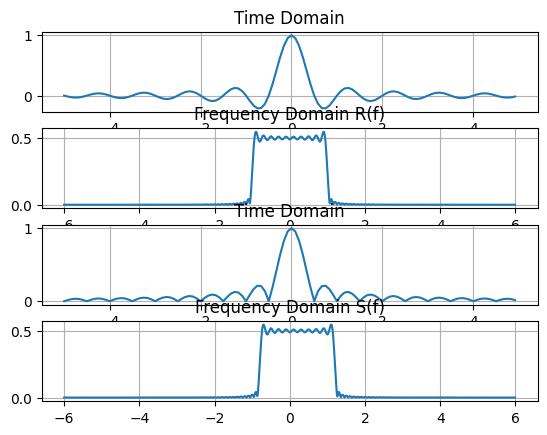

In [ ]:
#Horizontal scaling factor
a = 2

#Modulation frequency (normalized)
f0 = 0.2

#FFT size. Increase N to get more frequency domain samples
N = 2**10

#Sample Rate. Increase sample_rate to get a wider view
sample_rate = 12

#Radius. Increase radius to make the shape more box like
radius = 5

#sample points
t = np.arange(-radius, radius, 1/sample_rate)

#Normalized Frequencies
norm_freq = np.arange(0,N)/N

#sinc function
r = np.sinc(a*t)
R = np.fft.fft(r, N)

#Modulated sinc function
s = np.sinc(a*t)*np.exp(1j*2*np.pi*f0*t)
S = np.fft.fft(s,N)

#The fft function will zero pad s to get N samples
# use np.fft.fftshift to center frequencies around 0
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1)
ax1.grid(True)
ax1.plot(t,r)
ax1.set_title('Time Domain')

ax2.grid(True)
ax2.plot((norm_freq-1/2)*sample_rate, np.fft.fftshift(np.abs(R))/sample_rate)
ax2.set_title('Frequency Domain R(f)')

ax3.grid(True)
ax3.plot(t,np.abs(s))
ax3.set_title('Time Domain')

ax4.grid(True)
ax4.plot((norm_freq-1/2)*sample_rate, np.fft.fftshift(np.abs(S))/sample_rate)
ax4.set_title('Frequency Domain S(f)')

## **Summary: Discrete Fourier Transform Properties**

These are properties for the Discrete Fourier Transform (DFT), corresponding to the definition of ${\tt fft}$. These are similar to the (continuous) Fourier transform properties. Here $r[n]$ and $s[n]$ are vectors in the time domain and $R[k]$ and $S[k]$ are the DFTs of $r$ and $s$, respectively. The table lists time domain vectors, and their DFTs.

| **Vector.......................** | **Discrete Fourier Transform** | **Comments** |
|:-----------------|:------------------------------:|:-------------|
| $(r \cdot s)[n]$ | $\frac{1}{N}(R \ast S)[k]$ | Point-wise multiplication in the time domain corresponds to convolution in the frequency domain |
| $(r \ast s)[n]$ | $(R \cdot S)[k] $ | Convolution in the time domain corresponds to point-wise multiplication in the frequency domain |
| $(r+s)[n]$ | $(R + S)[k]$ | Summing in the time domain corresponds to summing in the frequency domain |
| $(\alpha\cdot r)[n]$ | $(\alpha\cdot R)[k]$ | Scalar multiplication in the time domain corresponds to scalar multiplication in the frequency domain |
| $r[n-n_0]$ | $e^{2\pi j*(n_0/N)*k}\cdot R[k]$ | Shifting in time induces a phase shift in the frequency domain |
| $e^{2\pi j*(k_0/N)*n}\cdot r[n]$ | $R[k-k_0]$ | **Modulation:** Pointwise-multiplication by a sinusoid in the time domain horizontally shifts the frequency domain |
| $r^*[n]$ | $R^*[-k]$ | Conjugation in the time domain corresponds to conjugation and reflection in the frequency domain |
||| Squishing and stretching formulas exist, but they are beyond the scope of this course |

References:

Kammler, D.W. (2007) A First Course in Fourier Analysis. Cambridge: Cambridge University Press.

**Exercise**

Do the problems on the Fourier Transform handout